# THE SPARK FOUNDATION
## Name- Anmol Agarwal
### Task - Exploratory Data Analysis
#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
As a business manager, try to find out the weak areas where you can
work to make more profit.

In [1]:
# First we will import our desired libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading our csv file
df= pd.read_csv('SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# For knowing no. of rows and columns
df.shape

(9994, 13)

In [4]:
# I have dropped the column 'Postal Code' From the dataset
df.drop(['Postal Code'], axis=1, inplace= True)
df


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
# Describing our dataframe with the help of describe function
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


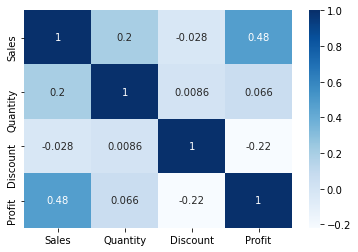

In [30]:
# visualizing the correlation between the terms with the help of Heatmap
sns.heatmap(df.corr(),annot = True, cmap = 'Blues')

## Basically It states the relation between the terms which means that how they are correlated with each other!! 

<ipython-input-38-5b8b1d0253e0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Segment')['Profit','Sales'].sum().plot.bar()


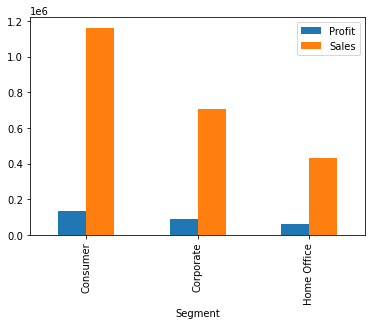

In [38]:
# Now first analyze on the basis of segments given in dataset
df.groupby('Segment')['Profit','Sales'].sum().plot.bar()

## From above observation we can conclude that 'Consumer' is that category in segment which is consisting the heighest sales as well as the profit!!

In [6]:
# It will state that how many Total categories are there!
df['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
# Dividing into groups on the basis of category and getting sum of sales for each group
df.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

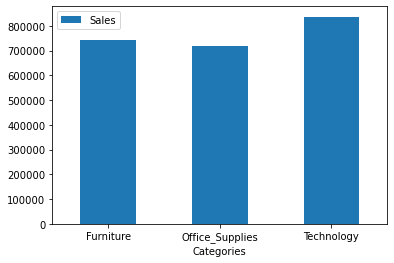

In [8]:
# Comparing these categories on the basis of Sales Produced
df1 = pd.DataFrame({'Categories':['Furniture', 'Office_Supplies', 'Technology'], 'Sales':[741999, 719047, 836154]})
ax = df1.plot.bar(x='Categories', y='Sales', rot=0)


## It concludes that <u>Technology</u> generated the heighest Sales!  

In [9]:
#Fetching profits of different Categories
df.groupby('Category')['Profit'].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

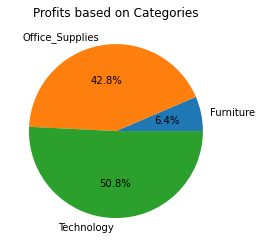

In [10]:
# Comparing these categories on the basis of generated Profits
Profits = [18451,122491,145454]
Categories =['Furniture', 'Office_Supplies', 'Technology']
plt.pie(Profits,labels=Categories,autopct='%1.1f%%')
plt.title('Profits based on Categories')
plt.show()


## This implies that <u>Technology</u> produces the heighest profit!!

In [11]:
# Dividing the groups on the basis of category and storing it in another dataframe
df2= df.groupby('Category')

In [12]:
# Fetching our desired group i.e Furniture and storing it in the new dataframe
df3=df2.get_group('Furniture')
df3.reset_index()

,index,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
3,5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
4,10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9962,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
2117,9964,Second Class,Corporate,United States,Newark,Delaware,East,Furniture,Furnishings,13.4000,1,0.00,6.4320
2118,9980,Second Class,Consumer,United States,Lafayette,Louisiana,South,Furniture,Tables,85.9800,1,0.00,22.3548
2119,9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028


In [13]:
#Dividing into the groups on the basis of sub-category and generating the sum of profits by each sub-category
df3.groupby('Sub-Category')['Profit'].sum()

Sub-Category
Bookcases      -3472.5560
Chairs         26590.1663
Furnishings    13059.1436
Tables        -17725.4811
Name: Profit, dtype: float64

Text(0, 0.5, 'Profits_and_Losses')

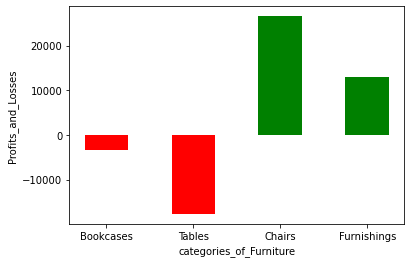

In [14]:
#For analyzing the profits and losses in sub categories of furnitur
x1=['Bookcases', 'Tables']
x2=['Chairs', 'Furnishings']
profit_quantity=[26590, 13059]
loss_quantity=[-3472,-17725]
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x1,loss_quantity, width=0.5, color='r')
ax.bar(x2,profit_quantity, width=0.5, color='g')
plt.xlabel('categories_of_Furniture')
plt.ylabel('Profits_and_Losses')


## By observing we can conclude that <u>'Chairs'</u> is the item in FURNITURE category which is giving the maximum profit and Tables is the sub-category which is giving the maximum loss!

In [15]:
#Fetching our desired group i.e. office Supplies and storing it in the new dataframe
df4=df2.get_group('Office Supplies')
df4.reset_index()

,index,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
1,4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
2,6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
3,8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825
4,9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,Central,Office Supplies,Paper,35.560,7,0.0,16.7132
6022,9984,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Labels,31.500,10,0.0,15.1200
6023,9985,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
6024,9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [16]:
#Dividing the groups on the basis of sub-category and calculating sum of profits for each sub-category
df4.groupby('Sub-Category')['Profit'].sum()

Sub-Category
Appliances    18138.0054
Art            6527.7870
Binders       30221.7633
Envelopes      6964.1767
Fasteners       949.5182
Labels         5546.2540
Paper         34053.5693
Storage       21278.8264
Supplies      -1189.0995
Name: Profit, dtype: float64

Text(0.5, 0, 'Profits_and_Losses')

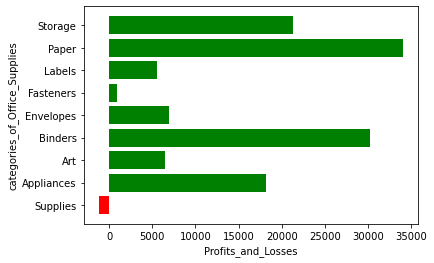

In [17]:
# For analyzing the profit and losses in sub categories of office supplies

x3=['Supplies']
x4=['Appliances','Art','Binders','Envelopes','Fasteners','Labels','Paper','Storage']
profit_quantity_1=[18138,6527,30221,6964,949,5546,34053,21278]
loss_quantity_1=[-1189]
fig = plt.figure()
ax = plt.subplot(111)
ax.barh(x3,loss_quantity_1, color='r')
ax.barh(x4,profit_quantity_1,color='g')
plt.ylabel('categories_of_Office_Supplies')
plt.xlabel('Profits_and_Losses')



## By observing we can conclude that <u>'Paper'</u> is the item in OFFICE_SUPPLIES  category which is giving the maximum profit and supplies is the only sub category which is giving us the loss!!


In [18]:
#fetching our desired group i.e. Technology 
df5=df2.get_group('Technology')
df5.reset_index()

,index,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152
1,11,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,911.424,4,0.2,68.3568
2,19,Second Class,Consumer,United States,San Francisco,California,West,Technology,Phones,213.480,3,0.2,16.0110
3,26,Second Class,Consumer,United States,Los Angeles,California,West,Technology,Accessories,90.570,3,0.0,11.7741
4,35,First Class,Corporate,United States,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,9983,Standard Class,Consumer,United States,Grand Rapids,Michigan,Central,Technology,Phones,97.980,2,0.0,27.4344
1843,9986,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.2208
1844,9987,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Accessories,79.990,1,0.0,28.7964
1845,9988,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.6470


In [19]:
# dividing the groups on the basis of sub_category and calculating the sum of profit generated by each sub category 
df5.groupby('Sub-Category')['Profit'].sum()

Sub-Category
Accessories    41936.6357
Copiers        55617.8249
Machines        3384.7569
Phones         44515.7306
Name: Profit, dtype: float64

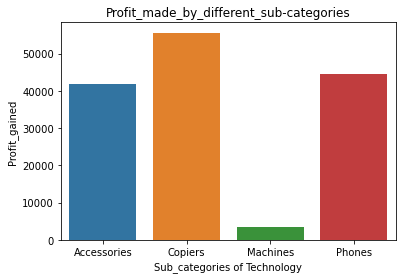

In [20]:
#graph.................
sns.barplot(x=['Accessories','Copiers','Machines','Phones'],y=[41936, 55617, 3384, 44515])
plt.title('Profit_made_by_different_sub-categories')
plt.xlabel('Sub_categories of Technology')
plt.ylabel('Profit_gained')
plt.show()

## By observing we can conclude that <u>'Copiers'</u> is the item in TECHNOLOGY  category which is giving the maximum profit

Text(0, 0.5, 'Discounts')

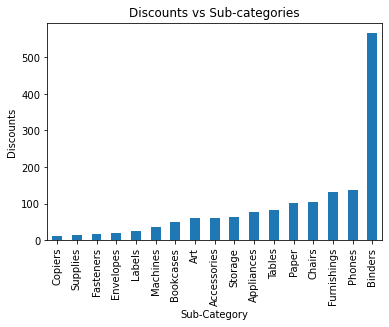

In [37]:
# At last analyzing the sub_categories based on the discounts given
df.groupby('Sub-Category')['Discount'].sum().sort_values(ascending =True).plot.bar()
plt.title('Discounts vs Sub-categories')
plt.ylabel('Discounts')

## This states that on 'BINDERS' the discount is given maximum !!

In [21]:
#let's find out the top 5 items categories  which is giving maximum profit including all categories
df_desc = df.sort_values(by= 'Profit', ascending=False)
df_desc.head(5)


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,Central,Technology,Copiers,17499.95,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,West,Technology,Copiers,13999.96,4,0.0,6719.9808
4190,Standard Class,Consumer,United States,Newark,Delaware,East,Technology,Copiers,10499.97,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,9892.74,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.95,5,0.0,4630.4755


## These are the Top 5 items which are generating maximum profits in different regions!

In [22]:
#similarly we can find out the bottom 5 
df_desc.tail(5)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4991,Standard Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3011,Standard Class,Home Office,United States,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
9774,Standard Class,Consumer,United States,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
683,Same Day,Corporate,United States,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780


 ## These are the bottom 5 Items  which are facing huge losses in different regions!

<ipython-input-31-059532465b0a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Profit','Sales'].sum().plot.bar()


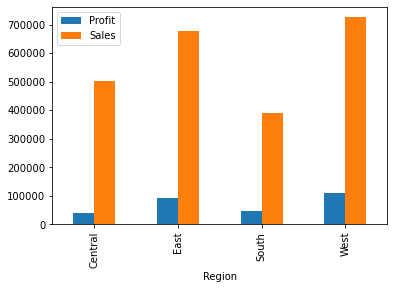

In [31]:
# Now let's analyze on the basis of regions.
df.groupby('Region')['Profit','Sales'].sum().plot.bar()

## By help of this graph we can conclude that 'West' region produces the heighest sales as well as the profit!

# Conclusion- 
## 1. We can reduce the discounts on the Tables and Bookcases in order to reduce the losses we are facing!
## 2. Sales in the central region is heigher than the south region but the profit generated in central region is quite low as compared with south region , So we need to look upon it in order to increase the profit in central region
## 3. Furniture category is generating very less profit in comparison with other two categories although the sales are quite similar, So we can slightly hike the price of furniture items in order to get good profit from them because the sales we are getting is quite good from this category!
                         